# Series de tiempo ERA5

## Importamos librerías necesarias

In [1]:
import sys
import pandas as pd
import numpy as np
import glob

## Adicionar los archivos .nc

En esta parte adicionamos el camino de todo los archivos .nc usando **`glob`**.

In [2]:
files = sorted(glob.glob('../data/*_CRS.nc'))
len(files)

5

In [3]:
print(files)

['../data/ERA5_2014_CRS.nc', '../data/ERA5_2015_CRS.nc', '../data/ERA5_2016_CRS.nc', '../data/ERA5_2017_CRS.nc', '../data/ERA5_2018_CRS.nc']


Importamos la librería **`xarray`**

In [4]:
import xarray as xr

Ahora vamos a leer todas los archivos **.nc**

In [5]:
ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:    (longitude: 11, latitude: 17, time: 7304)
Coordinates:
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -77.0 -76.75 -76.5
  * latitude   (latitude) float32 -7.0 -7.25 -7.5 -7.75 ... -10.5 -10.75 -11.0
  * time       (time) datetime64[ns] 2014-01-01 ... 2018-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1460, 17, 11), meta=np.ndarray>
    z          (time, latitude, longitude) float32 dask.array<chunksize=(1460, 17, 11), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(1460, 17, 11), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 21:31:19 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Veamos cómo están organizados los **.nc**!!

### En los datos de ERA5 superficial podemos convertir la variable **Geopotencial** para **elevación**. Podemos encontrar esta información y muchas más en la [documentación](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) del dataset.

Vamos a selecionar la variable Geopotencial y un tiempo para visualizar.

4558.583


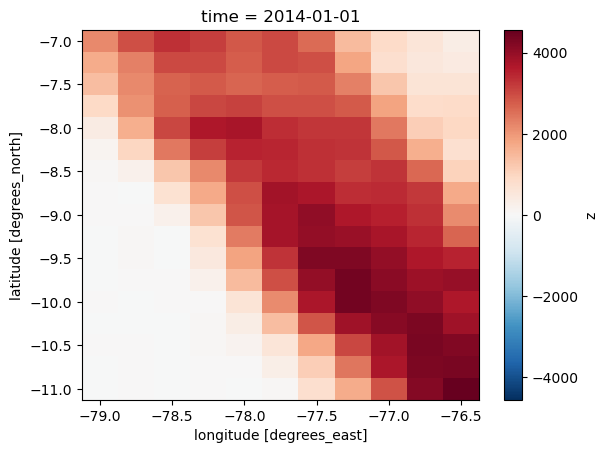

In [6]:
(ds['z'][0] / 9.80665).plot()
print((ds['z'][0].values / 9.80665).max())

Este es el DEM que usan para ejecutar el modelo global para genera los datos ERA5. 
* ¿Por qué los valores van hasta ~4500?
*  ¿Cuál es el [pico](https://es.wikipedia.org/wiki/Huascar%C3%A1n) más alto en Perú? 

## Datos geográficos de nuestra estación climática

In [7]:
## Lon, Lat, Elevacion

EMA06 = [-77.903333, -8.565889, 2729]
EMA15 = [-77.688333, -9.222450, 2118]

## Visualizar la localizacion de las estaciones

In [8]:
from matplotlib import pyplot as plt
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

In [9]:
projection = PlateCarree()

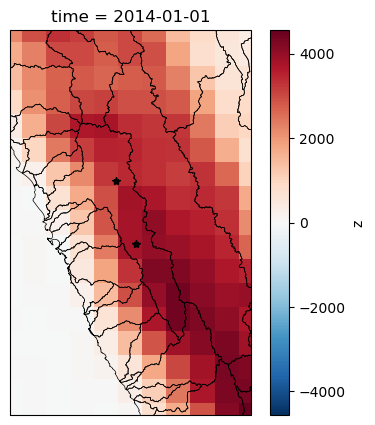

In [10]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de lon y lat de nuestra figura
ax.set_extent([-79, -76.5, -11, -7], crs=projection)

# Podemos agregar una información vectorial como un shapefile usando ´add_geometries´
fname = '../data/shapefiles/UH.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.5, crs=projection)

(ds['z'][0] / 9.80665).plot(ax=ax)

ax.plot(EMA06[0],EMA06[1], 'k*')
ax.plot(EMA15[0],EMA15[1], 'k*')

## Selección para una ubicación 

In [11]:
ERA5_EMA15 = ds.sel(longitude=EMA15[0], latitude= EMA15[1], method='nearest')
ERA5_EMA15

/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.Dataset>
Dimensions:    (time: 7304)
Coordinates:
    longitude  float32 -77.75
    latitude   float32 -9.25
  * time       (time) datetime64[ns] 2014-01-01 ... 2018-12-31T18:00:00
Data variables:
    t2m        (time) float32 dask.array<chunksize=(1460,), meta=np.ndarray>
    z          (time) float32 dask.array<chunksize=(1460,), meta=np.ndarray>
    tp         (time) float32 dask.array<chunksize=(1460,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 21:31:19 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

## Convertimos para un **`dataframe`**

In [12]:
df_ERA5_EMA06 = ERA5_EMA15.to_dataframe()
df_ERA5_EMA06

,longitude,latitude,t2m,z,tp
time,,,,,
2014-01-01 00:00:00,-77.75,-9.25,280.645813,37063.71875,1.158565e-05
2014-01-01 06:00:00,-77.75,-9.25,277.901794,37063.71875,0.000000e+00
2014-01-01 12:00:00,-77.75,-9.25,279.369354,37063.71875,0.000000e+00
2014-01-01 18:00:00,-77.75,-9.25,285.019684,37063.71875,7.392447e-04
2014-01-02 00:00:00,-77.75,-9.25,279.970215,37063.71875,1.873057e-04
...,...,...,...,...,...
2018-12-30 18:00:00,-77.75,-9.25,287.092529,37063.71875,3.051260e-04
2018-12-31 00:00:00,-77.75,-9.25,281.842804,37063.71875,4.348811e-05
2018-12-31 06:00:00,-77.75,-9.25,278.876556,37063.71875,4.726462e-07


## Convertir de UTC para hora local (LT)

In [13]:
df_ERA5_EMA06_LT = df_ERA5_EMA06.tz_localize('utc').tz_convert('America/Lima')
df_ERA5_EMA06_LT

,longitude,latitude,t2m,z,tp
time,,,,,
2013-12-31 19:00:00-05:00,-77.75,-9.25,280.645813,37063.71875,1.158565e-05
2014-01-01 01:00:00-05:00,-77.75,-9.25,277.901794,37063.71875,0.000000e+00
2014-01-01 07:00:00-05:00,-77.75,-9.25,279.369354,37063.71875,0.000000e+00
2014-01-01 13:00:00-05:00,-77.75,-9.25,285.019684,37063.71875,7.392447e-04
2014-01-01 19:00:00-05:00,-77.75,-9.25,279.970215,37063.71875,1.873057e-04
...,...,...,...,...,...
2018-12-30 13:00:00-05:00,-77.75,-9.25,287.092529,37063.71875,3.051260e-04
2018-12-30 19:00:00-05:00,-77.75,-9.25,281.842804,37063.71875,4.348811e-05
2018-12-31 01:00:00-05:00,-77.75,-9.25,278.876556,37063.71875,4.726462e-07


In [14]:
import datetime
dt1_list = []
for i in range(len(df_ERA5_EMA06_LT)):
    dt1_list.append(datetime.datetime(df_ERA5_EMA06_LT.index[i].year,
                  df_ERA5_EMA06_LT.index[i].month,
                  df_ERA5_EMA06_LT.index[i].day,                    
                  df_ERA5_EMA06_LT.index[i].hour,
                  df_ERA5_EMA06_LT.index[i].minute,
                  df_ERA5_EMA06_LT.index[i].second))


df_ERA5_EMA06_LT.index = dt1_list
df_ERA5_EMA06_LT.index.name = 'Datetime'

In [15]:
df_ERA5_EMA06_LT

,longitude,latitude,t2m,z,tp
Datetime,,,,,
2013-12-31 19:00:00,-77.75,-9.25,280.645813,37063.71875,1.158565e-05
2014-01-01 01:00:00,-77.75,-9.25,277.901794,37063.71875,0.000000e+00
2014-01-01 07:00:00,-77.75,-9.25,279.369354,37063.71875,0.000000e+00
2014-01-01 13:00:00,-77.75,-9.25,285.019684,37063.71875,7.392447e-04
2014-01-01 19:00:00,-77.75,-9.25,279.970215,37063.71875,1.873057e-04
...,...,...,...,...,...
2018-12-30 13:00:00,-77.75,-9.25,287.092529,37063.71875,3.051260e-04
2018-12-30 19:00:00,-77.75,-9.25,281.842804,37063.71875,4.348811e-05
2018-12-31 01:00:00,-77.75,-9.25,278.876556,37063.71875,4.726462e-07


# Guardando los datos

In [16]:
df_ERA5_EMA06_LT.to_csv('../data/ERA5_EMA15.csv', sep='\t')